# MLP Classification with Different Configurations

In [1]:
import collections
import math
import random
import time
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

fsize=(20.0, 15.0)
linewidth = 1.0
dotsize = 15

In [2]:
warnings.simplefilter('ignore')

### Create the Classification Data Sets

In [3]:
data_sets = []
colors = {0: 'r', 1: 'b'}

In [4]:
d = sklearn.datasets.make_moons(n_samples=2700, noise=0.2)
moons = pd.DataFrame(d[0])
moons.columns = ['x', 'y']
moons['t'] = d[1]

In [5]:
d, t = sklearn.datasets.make_classification(
        n_samples=2700,
        n_features=2,
        n_redundant=0)
classif = pd.DataFrame(d)
classif.columns = ['x', 'y']
classif['t'] = t

In [6]:
d, t = sklearn.datasets.make_circles(
        n_samples=2700,
        noise=0.1,
        factor=0.7)
circles = pd.DataFrame(d)
circles.columns = ['x', 'y']
circles['t'] = t

In [7]:
data_sets = [
     classif,
     moons,
     circles
]

In [8]:
n_points = 1000

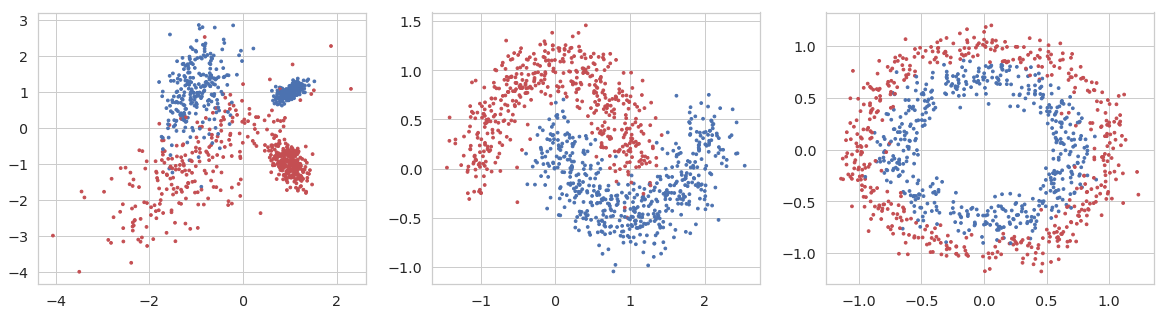

In [9]:
_ = plt.figure(figsize=(20, 5))
for i in range(3):
    _ = plt.subplot(1, 3, i+1)
    _ = plt.scatter(
            data_sets[i][:n_points].x,
            data_sets[i][:n_points].y,
            c=data_sets[i][:n_points].t.map(colors),
            marker='o',
            s=dotsize/2.0,
            label=None)

In [10]:
x_min, x_max = -5, 5
y_min, y_max = -5, 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

### Classification with Different MLP Layer Configurations

In [11]:
layer_configs = [
    (2,),
    (4,),
    (8,),
    (2, 2),
    (4, 4),
    (8, 8),
    (2, 2, 2),
    (4, 4, 4),
    (8, 8, 8)
]

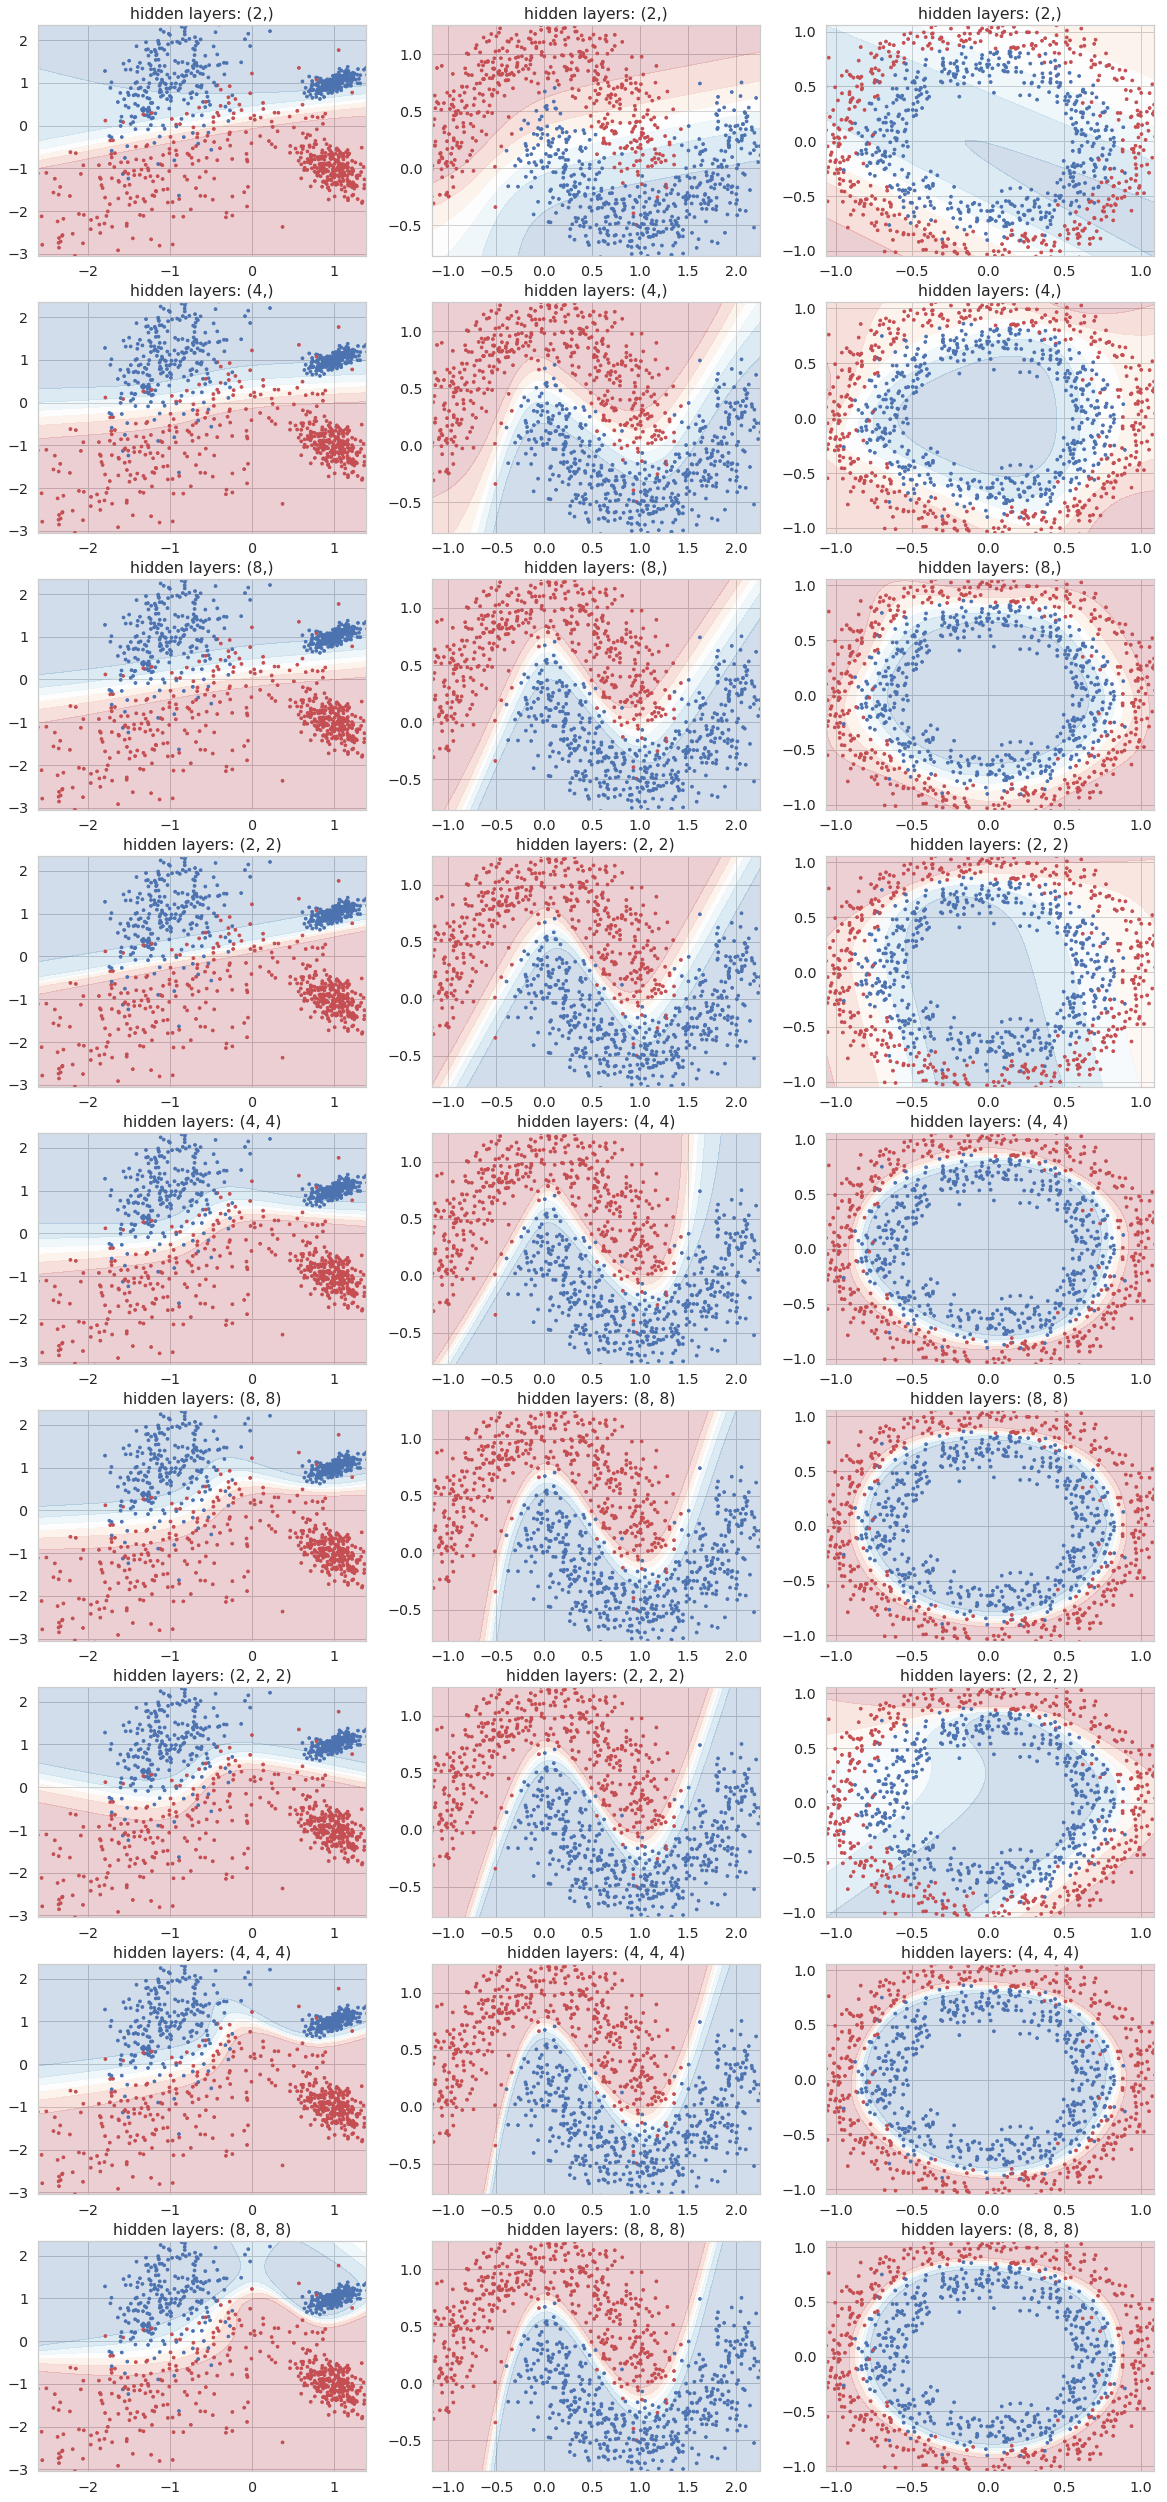

In [12]:
_ = plt.figure(figsize=(20, 5*len(layer_configs)))

for i in range(len(layer_configs)):
    
    for j in range(len(data_sets)):
    
        best_pred = None
        best_score = None
        best_model = None

        for k in range(20):
            m = sklearn.neural_network.MLPClassifier(
                    hidden_layer_sizes=layer_configs[i],
                    activation='tanh',
                    max_iter=1000,
                    random_state=k)

            m.fit(data_sets[j][:n_points][['x', 'y']], data_sets[j][:n_points].t)

            pred = m.predict(data_sets[j][:n_points][['x', 'y']])

            score = sklearn.metrics.roc_auc_score(data_sets[j][:n_points].t, pred)

            if (best_score is None) or (score > best_score):
                best_pred = pred
                best_score = score
                best_model = m

        ax = plt.subplot(len(layer_configs), 3, i*len(data_sets) + j + 1)

        Z = best_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        _ = ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.2)

        _ = plt.scatter(
                data_sets[j][:n_points].x,
                data_sets[j][:n_points].y,
                c=data_sets[j][:n_points].t.map(colors),
                marker='o',
                s=dotsize/2.0,
                label=None)
        _ = plt.xlim((
                data_sets[j][:n_points].x.quantile(0.01),
                data_sets[j][:n_points].x.quantile(0.99)))
        _ = plt.ylim((
                data_sets[j][:n_points].y.quantile(0.01),
                data_sets[j][:n_points].y.quantile(0.99)))
        _ = plt.title('hidden layers: ' + str(layer_configs[i]))

### Classification with Different Data Set Sizes

In [13]:
data_set_sizes = [
    100,
    300,
    900,
    2700
]

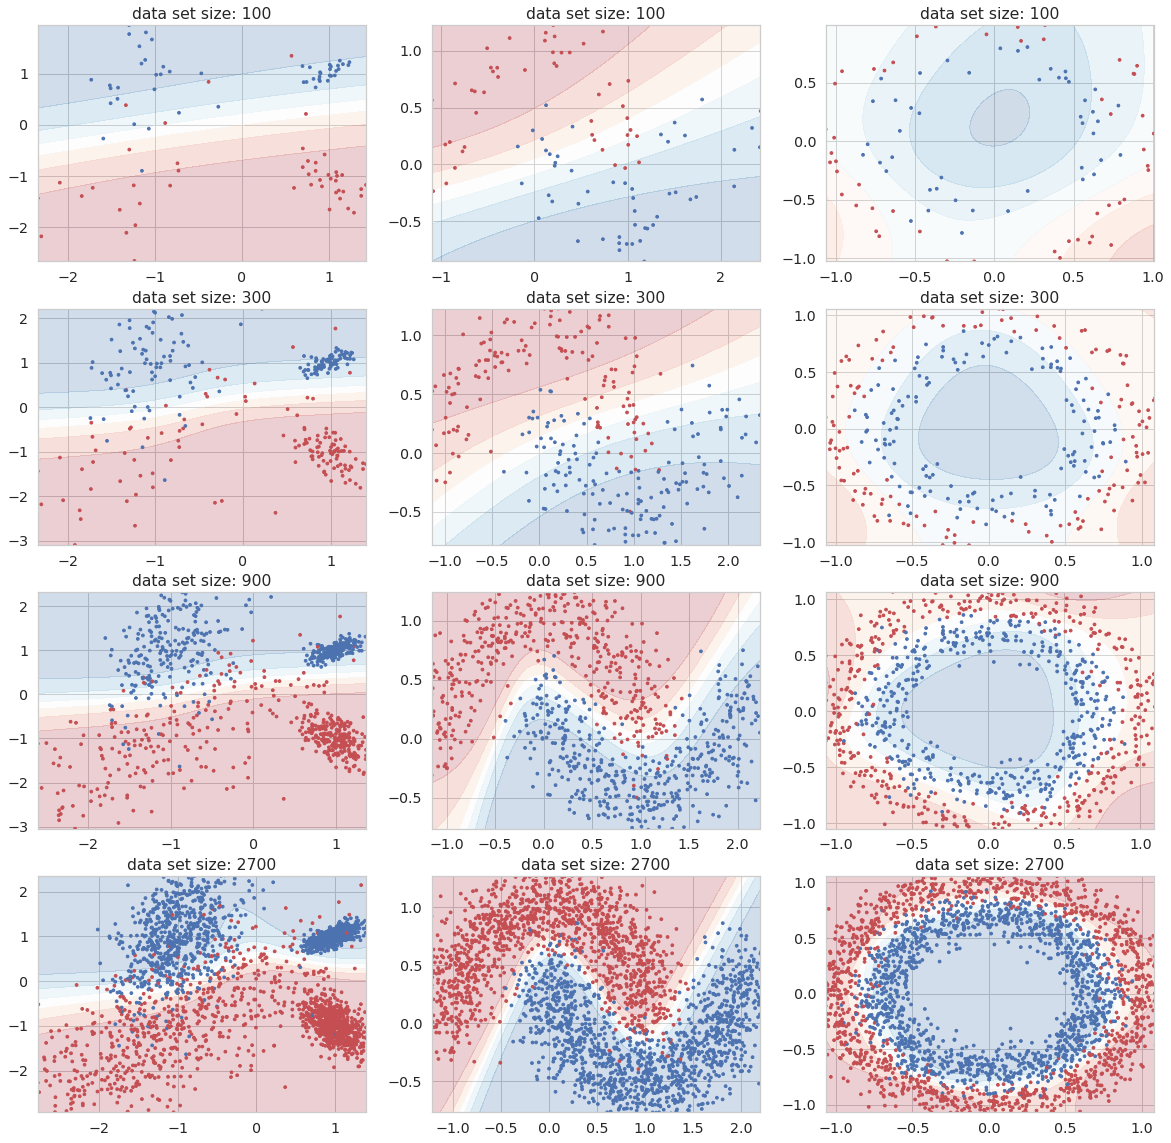

In [14]:
_ = plt.figure(figsize=(20, 5*len(data_set_sizes)))

for i in range(len(data_set_sizes)):
    
    for j in range(len(data_sets)):
    
        best_pred = None
        best_score = None
        best_model = None

        for k in range(20):
            m = sklearn.neural_network.MLPClassifier(
                    hidden_layer_sizes=(4,),
                    activation='tanh',
                    max_iter=1000,
                    random_state=k)

            m.fit(data_sets[j][:data_set_sizes[i]][['x', 'y']], data_sets[j][:data_set_sizes[i]].t)

            pred = m.predict(data_sets[j][:data_set_sizes[i]][['x', 'y']])

            score = sklearn.metrics.roc_auc_score(data_sets[j][:data_set_sizes[i]].t, pred)

            if (best_score is None) or (score > best_score):
                best_pred = pred
                best_score = score
                best_model = m

        ax = plt.subplot(len(data_set_sizes), 3, i*len(data_sets) + j + 1)

        Z = best_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        _ = ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.2)

        _ = plt.scatter(
                data_sets[j][:data_set_sizes[i]].x,
                data_sets[j][:data_set_sizes[i]].y,
                c=data_sets[j][:data_set_sizes[i]].t.map(colors),
                marker='o',
                s=dotsize/2.0,
                label=None)
        _ = plt.xlim((
                data_sets[j][:data_set_sizes[i]].x.quantile(0.01),
                data_sets[j][:data_set_sizes[i]].x.quantile(0.99)))
        _ = plt.ylim((
                data_sets[j][:data_set_sizes[i]].y.quantile(0.01),
                data_sets[j][:data_set_sizes[i]].y.quantile(0.99)))
        _ = plt.title('data set size: ' + str(data_set_sizes[i]))

### Classification with Different Regularization Parameters

In [15]:
reg_params = [
    0,
    1e-6,
    1e-4,
    1e-2,
    1,
    1e2,
    1e4,
    1e6
]

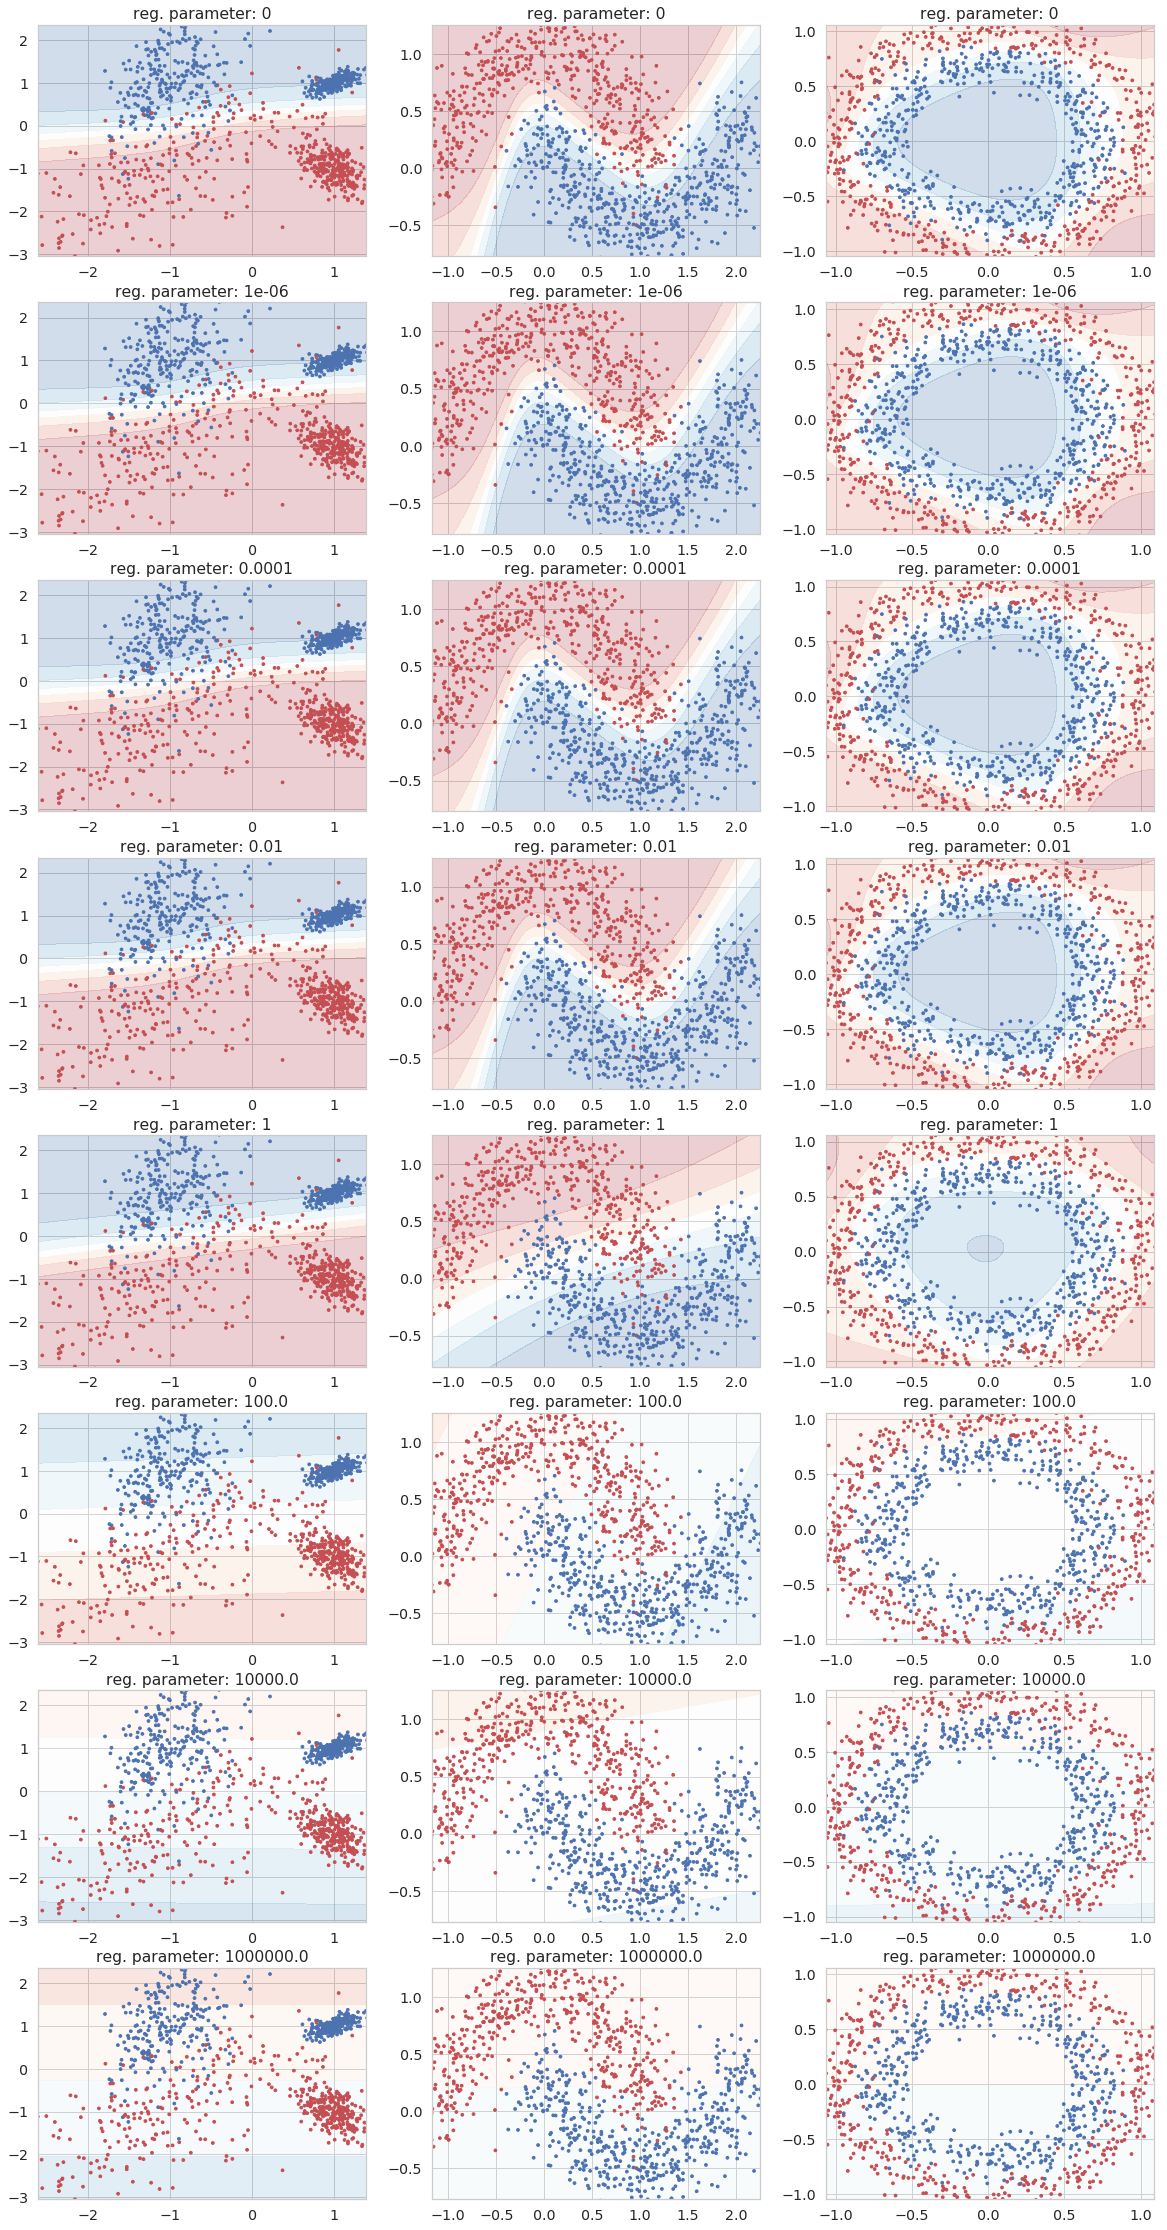

In [16]:
_ = plt.figure(figsize=(20, 5*len(reg_params)))

for i in range(len(reg_params)):
    
    for j in range(len(data_sets)):
    
        best_pred = None
        best_score = None
        best_model = None

        for k in range(20):
            m = sklearn.neural_network.MLPClassifier(
                    hidden_layer_sizes=(4,),
                    activation='tanh',
                    max_iter=1000,
                    alpha=reg_params[i],
                    random_state=k)

            m.fit(data_sets[j][:n_points][['x', 'y']], data_sets[j][:n_points].t)

            pred = m.predict(data_sets[j][:n_points][['x', 'y']])

            score = sklearn.metrics.roc_auc_score(data_sets[j][:n_points].t, pred)

            if (best_score is None) or (score > best_score):
                best_pred = pred
                best_score = score
                best_model = m

        ax = plt.subplot(len(reg_params), 3, i*len(data_sets) + j + 1)

        Z = best_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        _ = ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.2)

        _ = plt.scatter(
                data_sets[j][:n_points].x,
                data_sets[j][:n_points].y,
                c=data_sets[j][:n_points].t.map(colors),
                marker='o',
                s=dotsize/2.0,
                label=None)
        _ = plt.xlim((
                data_sets[j][:n_points].x.quantile(0.01),
                data_sets[j][:n_points].x.quantile(0.99)))
        _ = plt.ylim((
                data_sets[j][:n_points].y.quantile(0.01),
                data_sets[j][:n_points].y.quantile(0.99)))
        _ = plt.title('reg. parameter: ' + str(reg_params[i]))